In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of students to simulate
n_students = 100000

# Generate synthetic data
data = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'last_login_days': np.random.exponential(scale=10, size=n_students).astype(int),
    'avg_score': np.clip(np.random.normal(loc=70, scale=15, size=n_students), 0, 100),
    'quiz_completion_rate': np.clip(np.random.beta(a=2, b=1.5, size=n_students), 0, 1),
    'forum_posts': np.random.poisson(lam=3, size=n_students),
    'video_views_per_week': np.random.poisson(lam=5, size=n_students),
    'live_session_attendance': np.random.binomial(n=10, p=0.4, size=n_students),
})

# Define dropout probability based on engagement and performance
def compute_dropout(row):
    score = row['avg_score']
    login = row['last_login_days']
    quiz_rate = row['quiz_completion_rate']
    posts = row['forum_posts']
    views = row['video_views_per_week']
    sessions = row['live_session_attendance']
    
    # Heuristic-based dropout probability
    prob = 0.2
    if login > 14:
        prob += 0.3
    if score < 60:
        prob += 0.2
    if quiz_rate < 0.5:
        prob += 0.2
    if posts < 2:
        prob += 0.1
    if views < 3:
        prob += 0.1
    if sessions < 3:
        prob += 0.1

    return np.random.rand() < prob

# Apply dropout logic
data['dropout'] = data.apply(compute_dropout, axis=1).astype(int)

# View the first few rows
print(data.head())


   student_id  last_login_days   avg_score  quiz_completion_rate  forum_posts  \
0           1                4   82.640666              0.934974            4   
1           2               30  100.000000              0.612070            2   
2           3               13   68.498028              0.528939            3   
3           4                9   37.035934              0.218838            5   
4           5                1   91.380210              0.327573            2   

   video_views_per_week  live_session_attendance  dropout  
0                     2                        2        0  
1                     4                        4        1  
2                     5                        1        0  
3                     5                        4        1  
4                     6                        4        1  


In [2]:
data.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\raw\student_engagement_data.csv', index=False)

In [3]:
data.shape

(100000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   student_id               100000 non-null  int64  
 1   last_login_days          100000 non-null  int32  
 2   avg_score                100000 non-null  float64
 3   quiz_completion_rate     100000 non-null  float64
 4   forum_posts              100000 non-null  int32  
 5   video_views_per_week     100000 non-null  int32  
 6   live_session_attendance  100000 non-null  int32  
 7   dropout                  100000 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 4.2 MB


In [5]:
data.describe()

,student_id,last_login_days,avg_score,quiz_completion_rate,forum_posts,video_views_per_week,live_session_attendance,dropout
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,9.466600,69.912272,0.572050,3.004030,4.994810,4.001760,0.442490
std,28867.657797,9.924956,14.674316,0.233726,1.731948,2.232925,1.550303,0.496684
min,1.000000,0.000000,10.010016,0.001100,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,2.000000,59.962871,0.395108,2.000000,3.000000,3.000000,0.000000
50%,50000.500000,6.000000,70.004415,0.585861,3.000000,5.000000,4.000000,0.000000
75%,75000.250000,13.000000,80.106871,0.762178,4.000000,6.000000,5.000000,1.000000
max,100000.000000,117.000000,100.000000,0.999951,13.000000,19.000000,10.000000,1.000000


In [6]:
data['dropout'].value_counts(normalize=True)

dropout
0    0.55751
1    0.44249
Name: proportion, dtype: float64

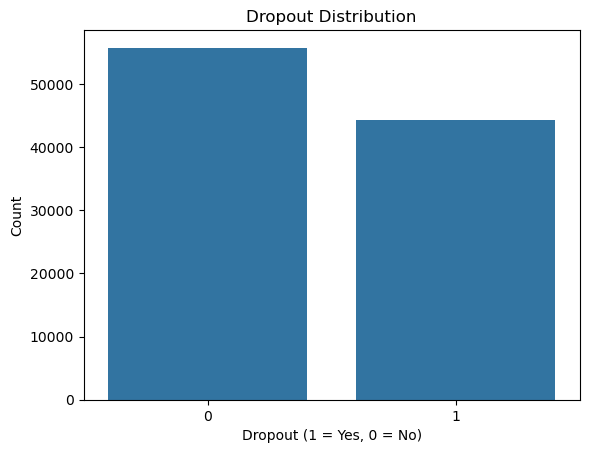

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='dropout', data=data)
plt.title("Dropout Distribution")
plt.xlabel("Dropout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


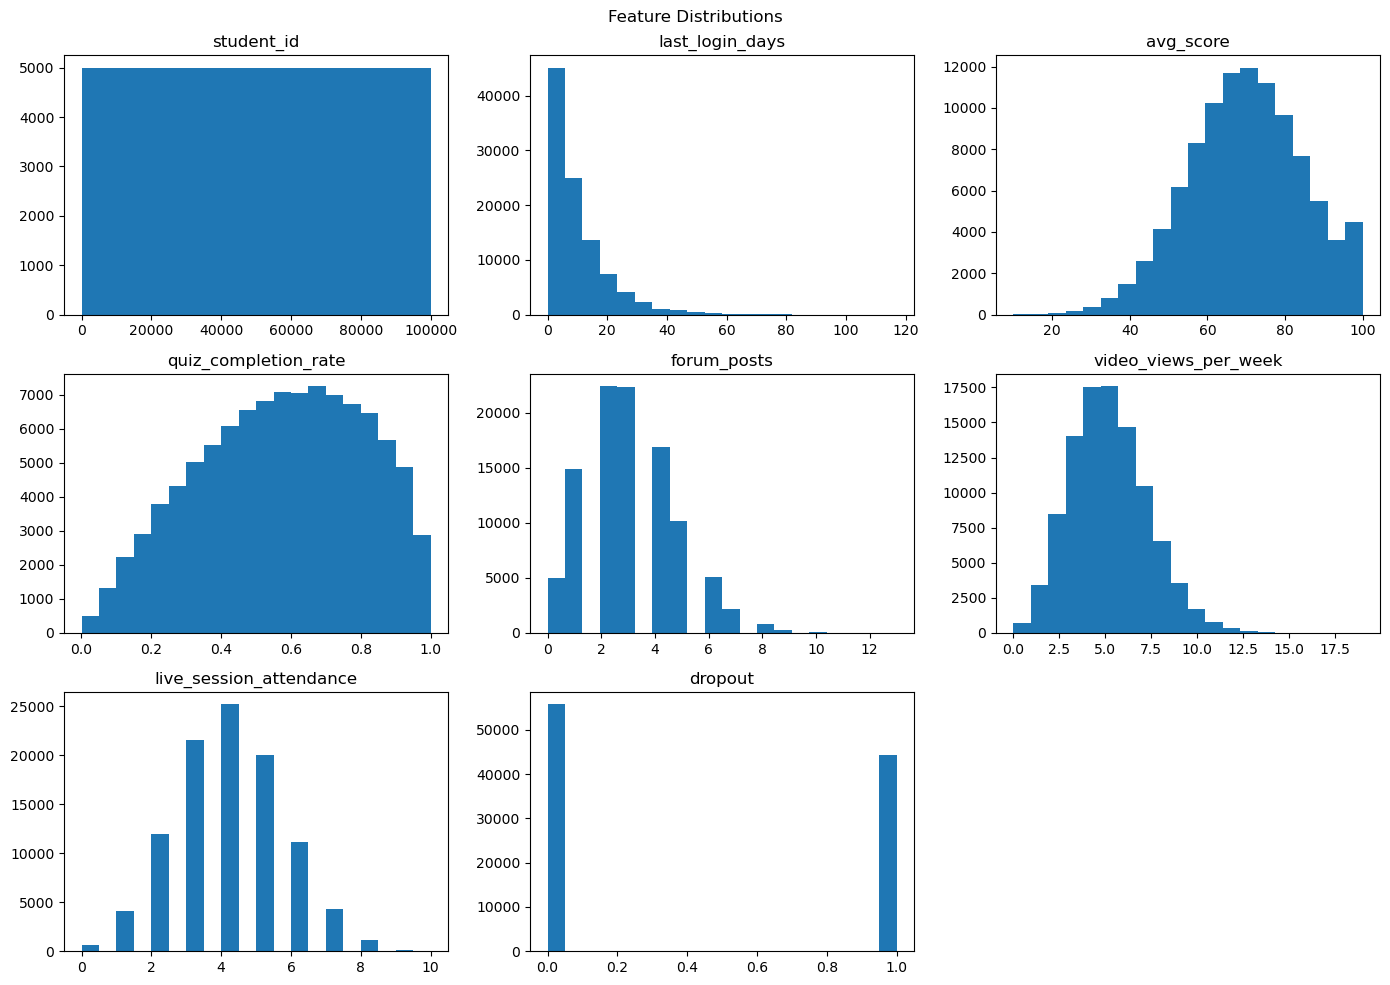

In [8]:
# Histogram for each numeric column
data.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

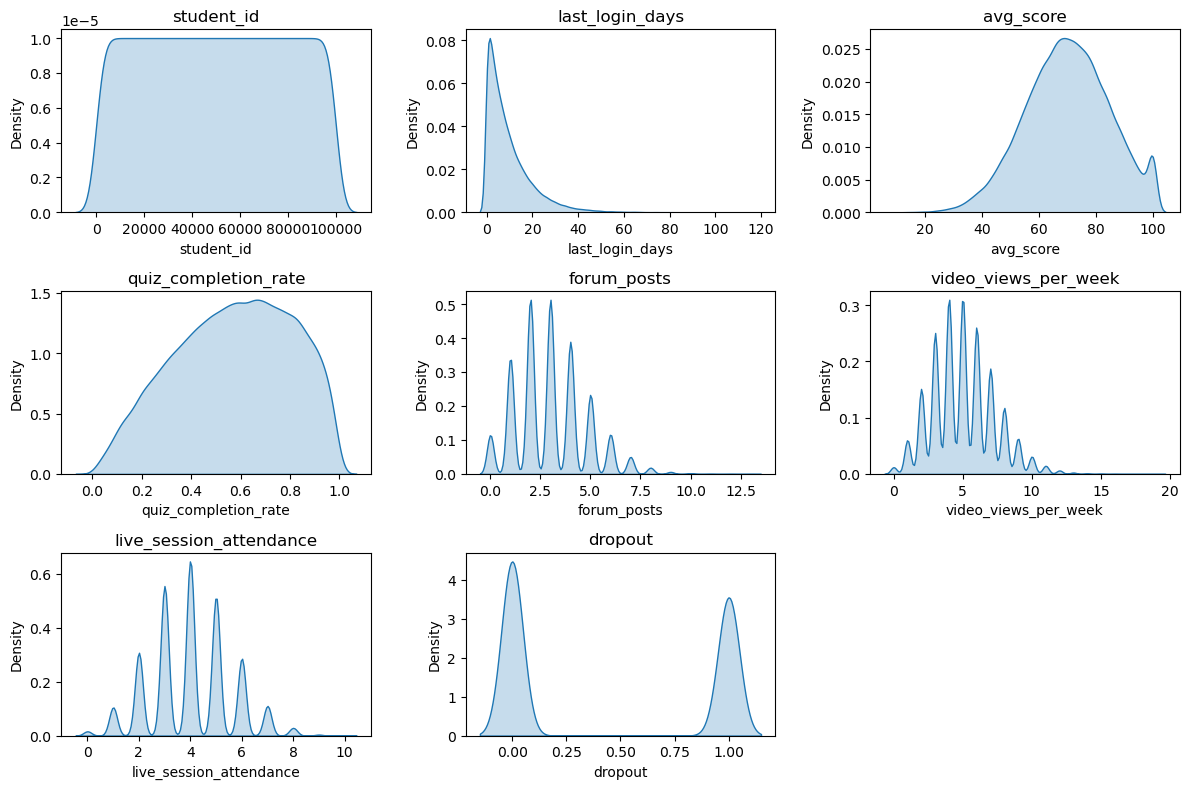

In [9]:
import warnings
warnings.filterwarnings("ignore")
# KDE plots for key features
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()

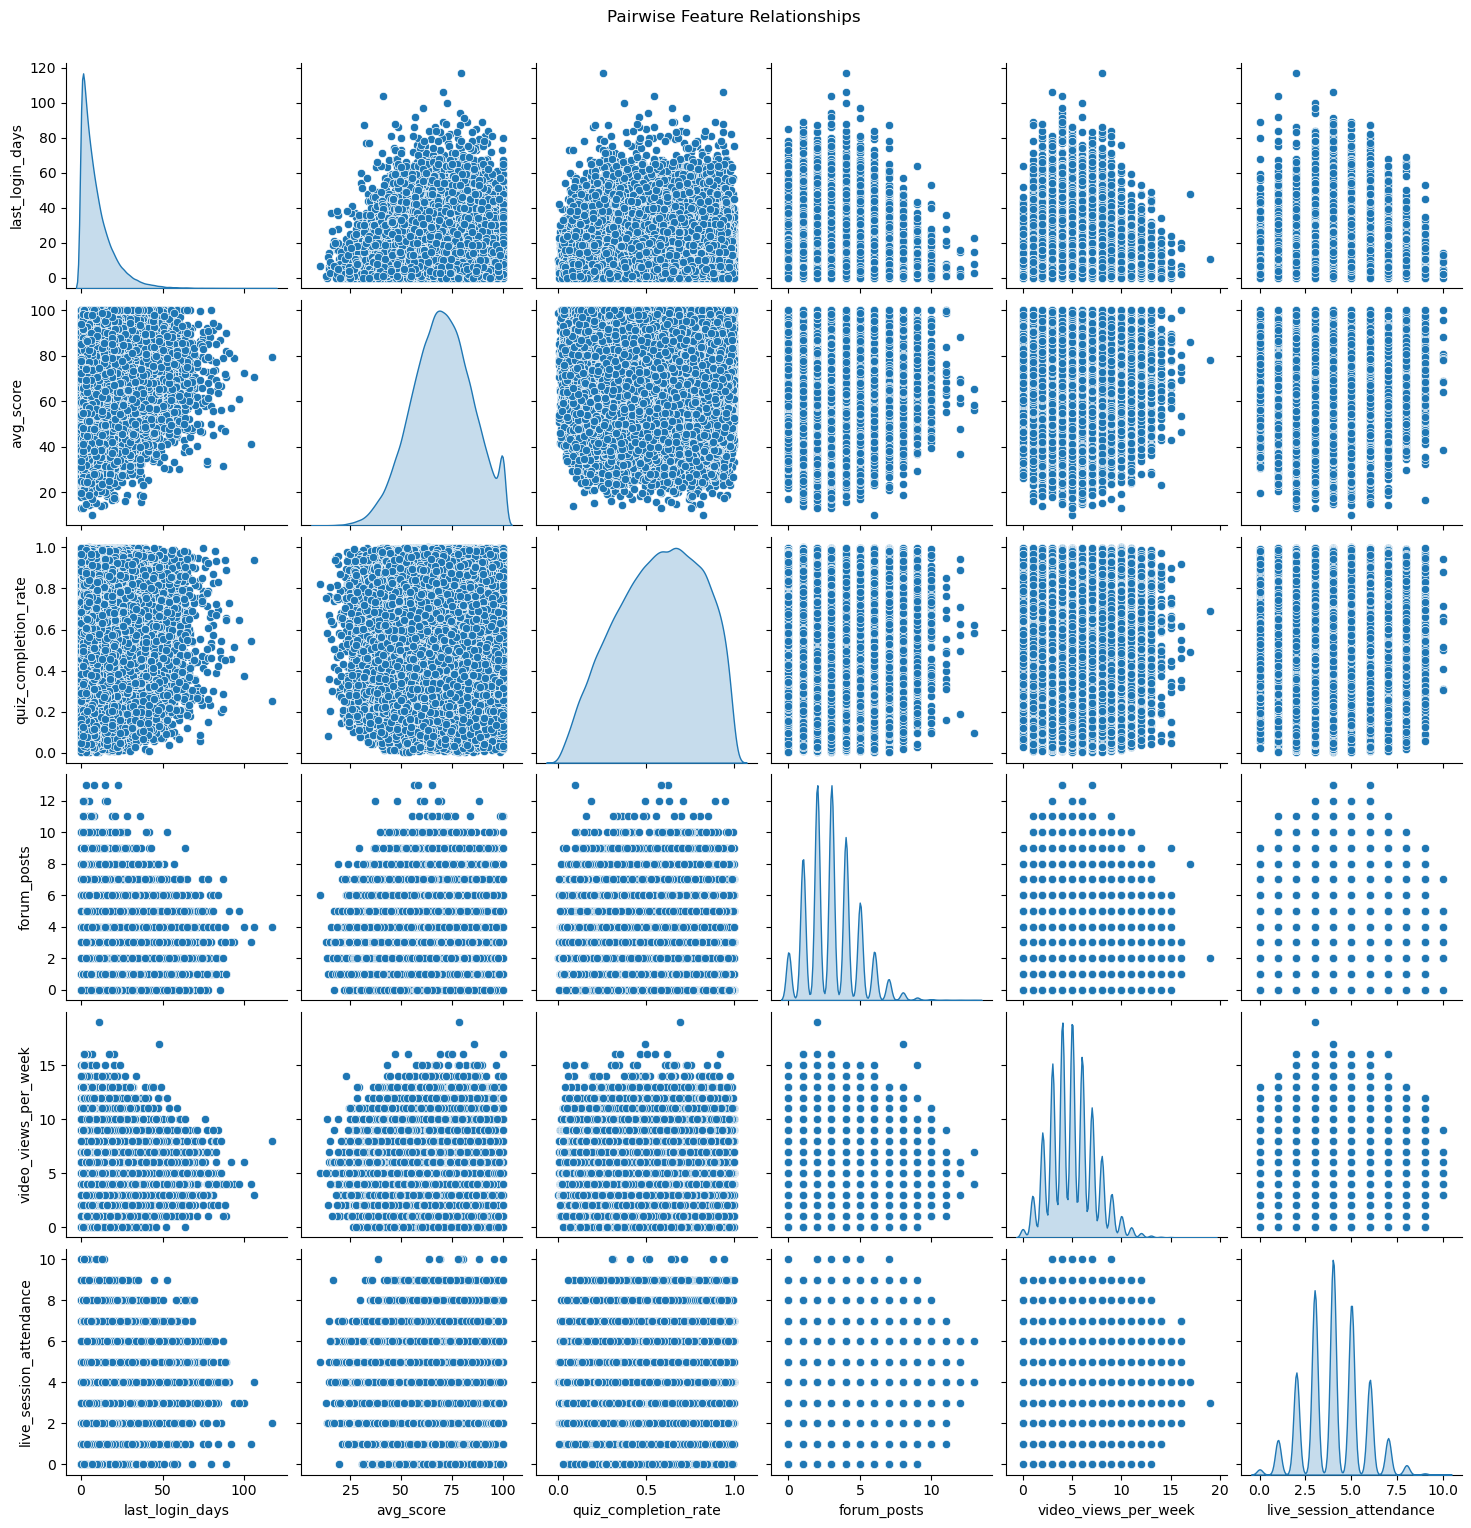

In [10]:
sns.pairplot(data[['last_login_days','avg_score','quiz_completion_rate','forum_posts','video_views_per_week','live_session_attendance']], diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

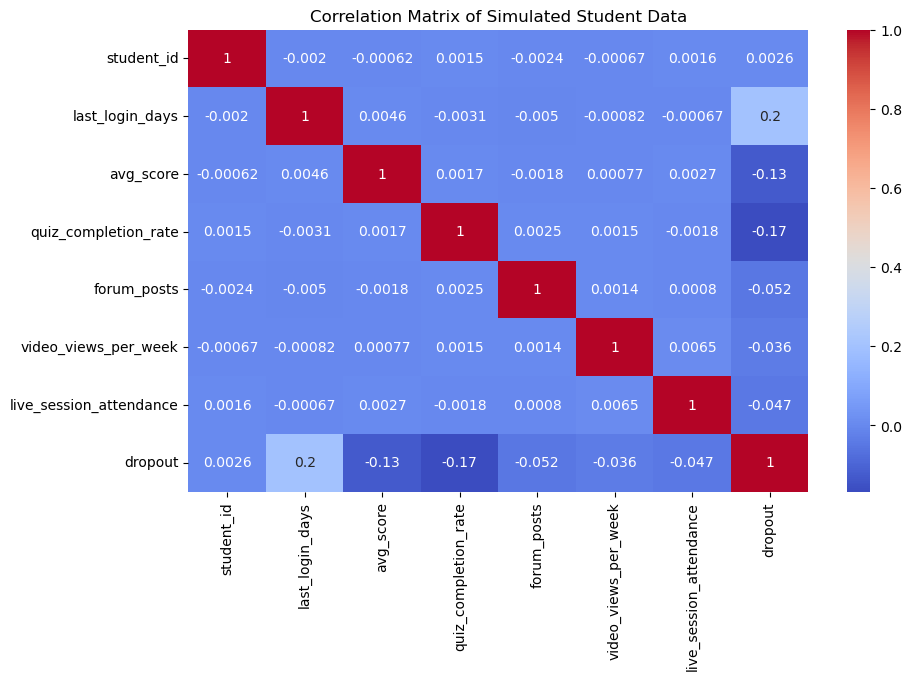

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Simulated Student Data")
plt.show()

<Axes: >

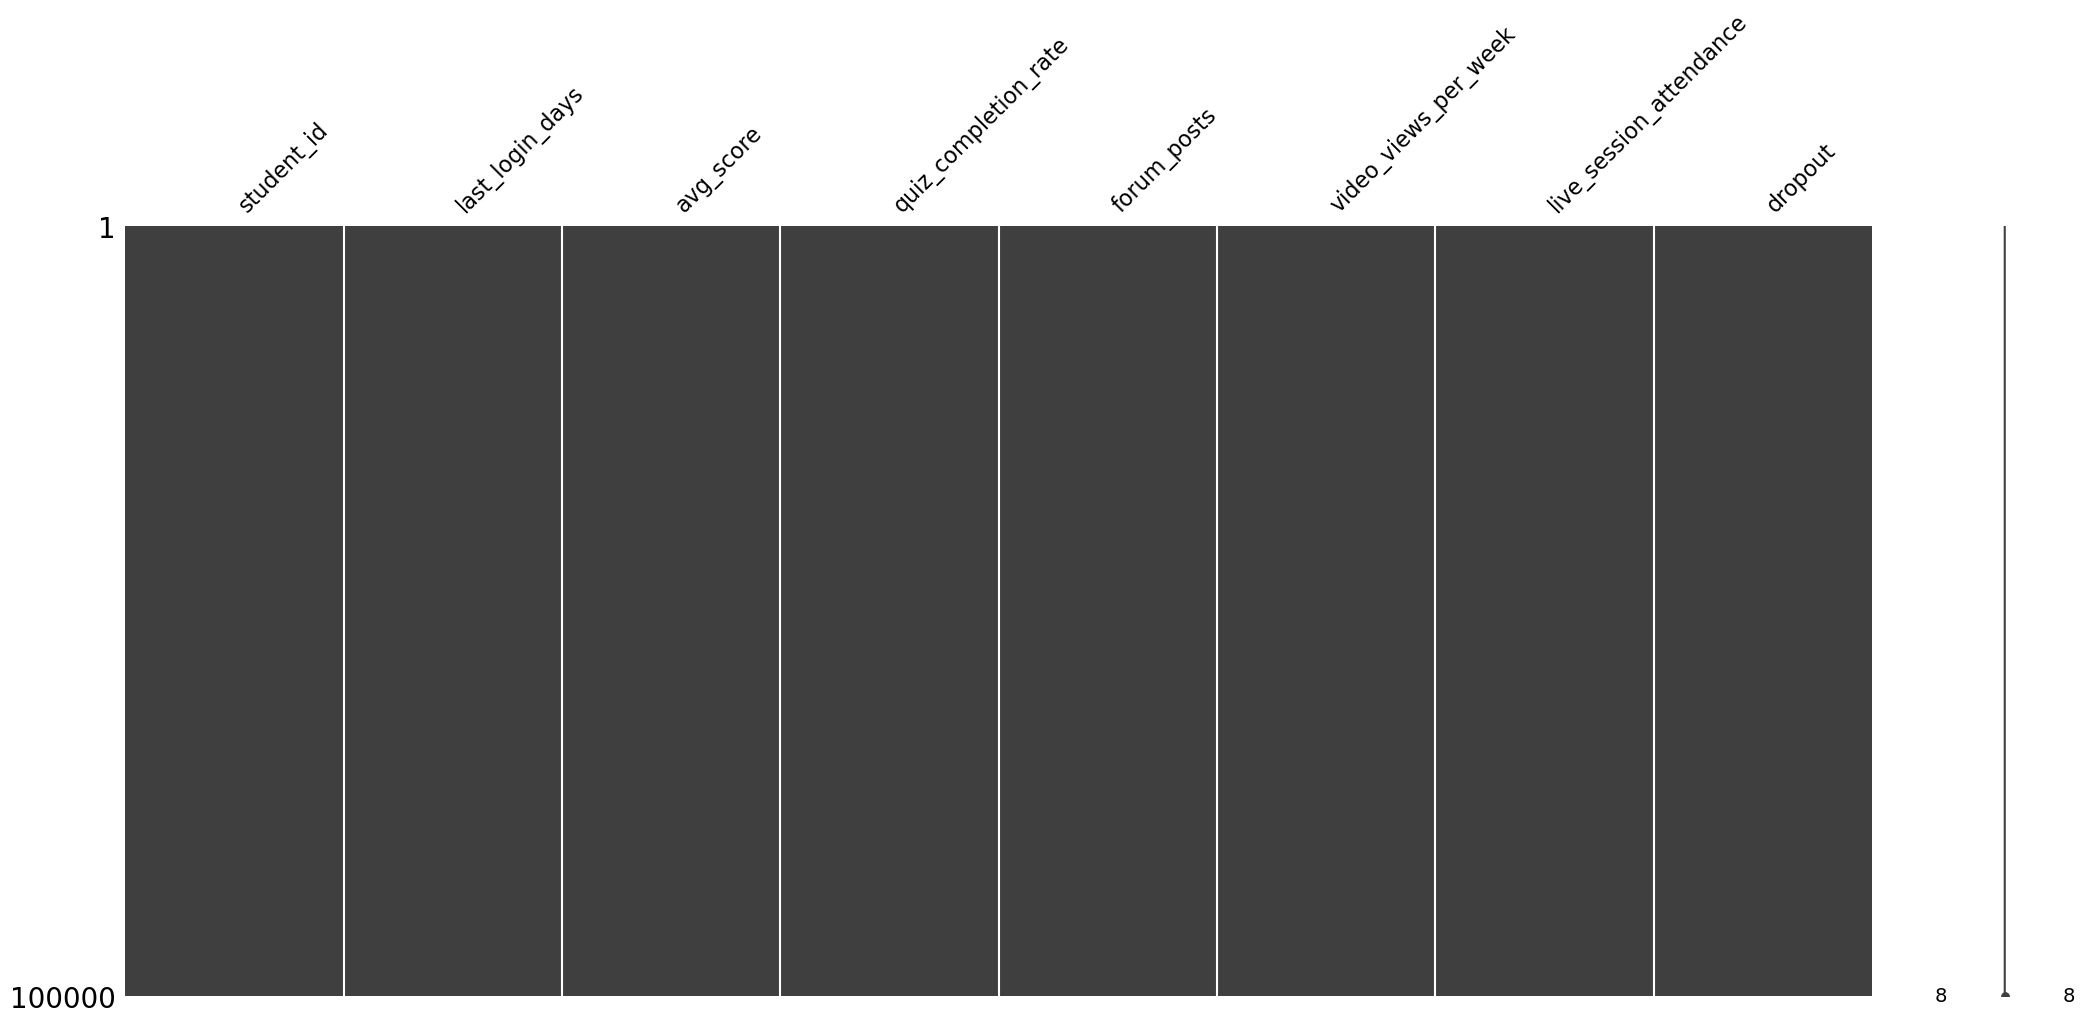

In [13]:
import missingno as msno 
msno.matrix(data)

In [14]:
data.isnull().sum()

student_id                 0
last_login_days            0
avg_score                  0
quiz_completion_rate       0
forum_posts                0
video_views_per_week       0
live_session_attendance    0
dropout                    0
dtype: int64

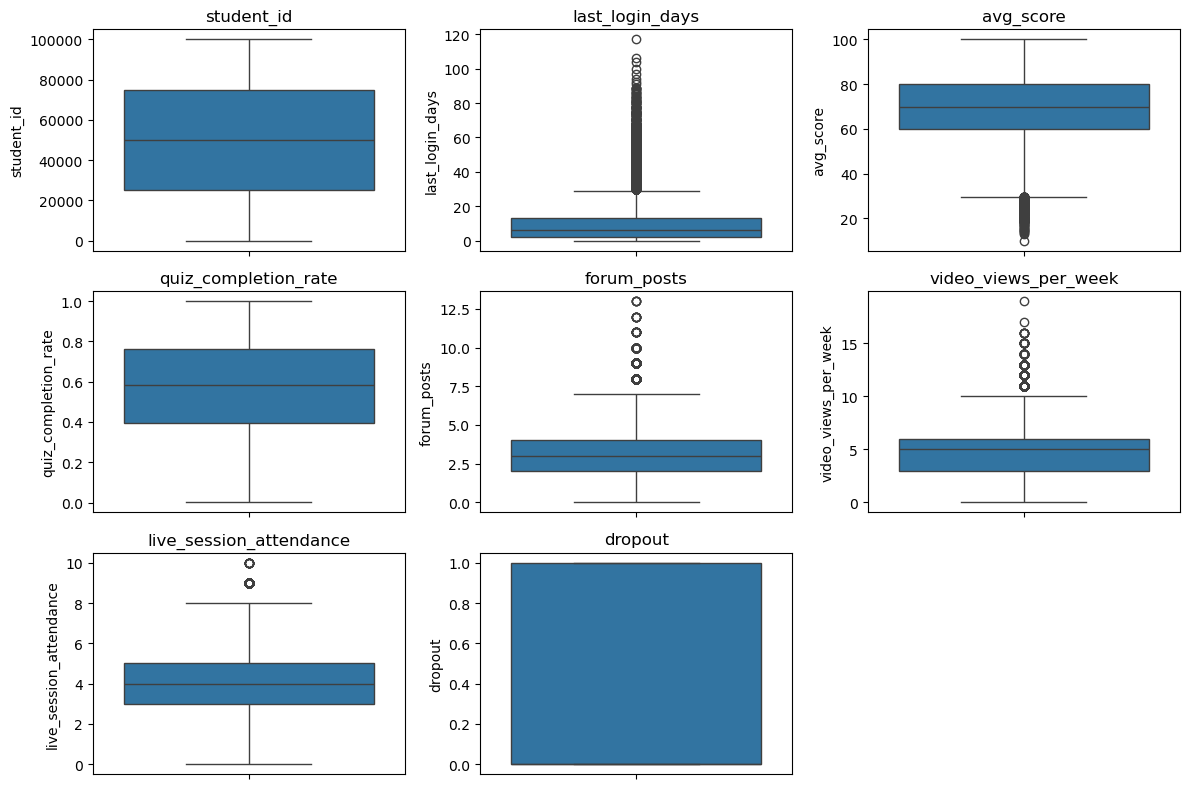

In [15]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats.mstats import winsorize
data['last_login_days'] = winsorize(data['last_login_days'], limits=[0.05, 0.05])
data['avg_score'] = winsorize(data['avg_score'], limits=[0.05, 0.05])
data['forum_posts'] = winsorize(data['forum_posts'], limits=[0.05, 0.05])
data['video_views_per_week'] = winsorize(data['video_views_per_week'], limits=[0.05, 0.05])
data['live_session_attendance'] = winsorize(data['live_session_attendance'], limits=[0.05, 0.05])

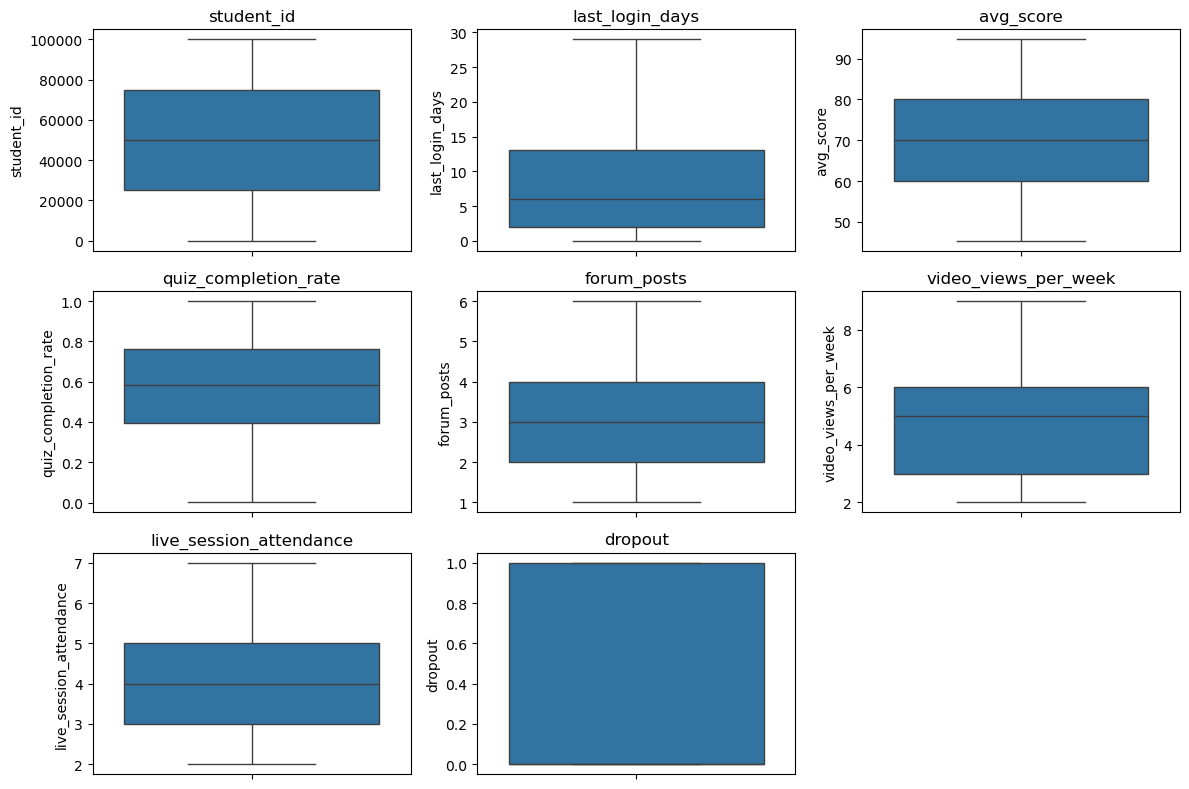

In [17]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [18]:
X = data.drop(columns=['student_id', 'dropout']) # features
y = data['dropout'] # target variable

In [19]:
import os
import sys
sys.path.append(os.path.abspath(r'D:\Guvi_Project\Personalized Learning Assistant\src'))
from feature_engineering import normalisation
X_scaled = normalisation(X, name='StandardScaler-sec4')

StandardScaler-sec4 Model saved successfully.


In [20]:
X_scaled.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\processed\student_engagement_data_cleaned.csv', index=False)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [22]:
from Model_Training import pickle_dump
pickle_dump(model, name='XGBClassifier-sec4')

XGBClassifier-sec4 Model saved successfully.


In [23]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     11150
           1       0.65      0.51      0.57      8850

    accuracy                           0.66     20000
   macro avg       0.66      0.64      0.64     20000
weighted avg       0.66      0.66      0.65     20000

Confusion Matrix:
[[8688 2462]
 [4336 4514]]


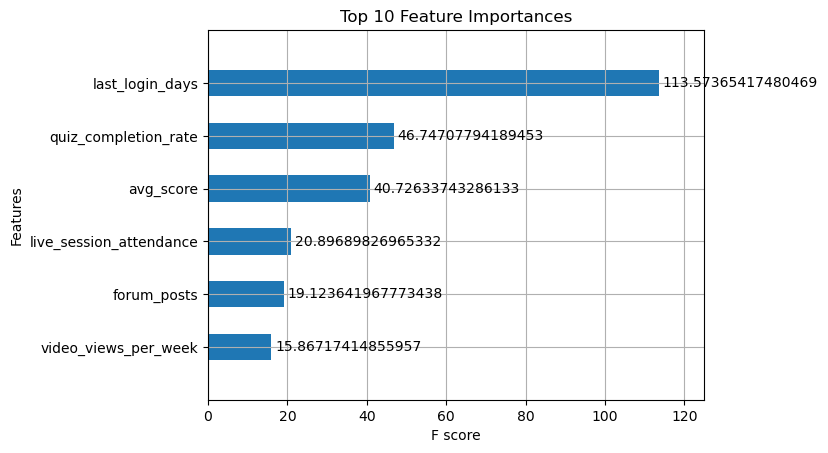

In [24]:
# feature importance
xgb.plot_importance(model, height=0.5, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.71
